In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [4]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [5]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


### CLEAN THE DATA

In [7]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08,23.98
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08,99.99
2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08,700.00
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08,7.68
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08,7.68


In [9]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903.0,1.811768e+06,1.822257e+06
02,13449.0,2.188885e+06,2.202022e+06
03,17005.0,2.791208e+06,2.807100e+06
04,20558.0,3.367671e+06,3.390670e+06
05,18667.0,3.135125e+06,3.152607e+06
06,15253.0,2.562026e+06,2.577802e+06
07,16072.0,2.632540e+06,2.647776e+06
08,13448.0,2.230345e+06,2.244468e+06
09,13109.0,2.084992e+06,2.097560e+06


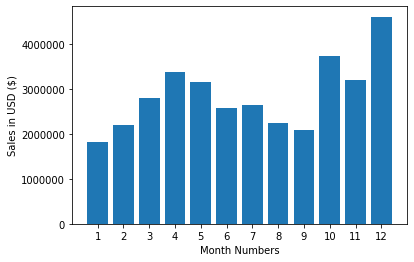

In [10]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Numbers')
plt.show()

In [11]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903.0,1.811768e+06,1.822257e+06
02,13449.0,2.188885e+06,2.202022e+06
03,17005.0,2.791208e+06,2.807100e+06
04,20558.0,3.367671e+06,3.390670e+06
05,18667.0,3.135125e+06,3.152607e+06
06,15253.0,2.562026e+06,2.577802e+06
07,16072.0,2.632540e+06,2.647776e+06
08,13448.0,2.230345e+06,2.244468e+06
09,13109.0,2.084992e+06,2.097560e+06


### Use Split function and extract City name from Purchase Address

In [12]:
### CITY
def get_city(address):
    return address.split(',')[1]

###STATES
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2.0,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1.0,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas (TX)
2,236672,iPhone,1.0,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2.0,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2.0,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08,7.68,New York City (NY)


In [13]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602.0,2.779908e+06,2.795499e+06
Austin (TX),11153.0,1.809874e+06,1.819582e+06
Boston (MA),22528.0,3.637410e+06,3.661642e+06
Dallas (TX),16730.0,2.752628e+06,2.767975e+06
Los Angeles (CA),33289.0,5.421435e+06,5.452571e+06
New York City (NY),27932.0,4.635371e+06,4.664317e+06
Portland (ME),2750.0,4.471892e+05,4.497583e+05
Portland (OR),11303.0,1.860558e+06,1.870732e+06
San Francisco (CA),50239.0,8.211462e+06,8.262204e+06


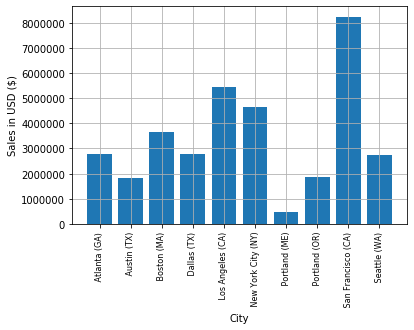

In [14]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.grid()
plt.show()

In [15]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas (TX)
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",08,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",08,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",08,7.68,New York City (NY)


In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,236670,Wired Headphones,2.0,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle (WA),22
1,236671,Bose SoundSport Headphones,1.0,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas (TX),15
2,236672,iPhone,1.0,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",08,700.00,Portland (OR),14
3,236673,AA Batteries (4-pack),2.0,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",08,7.68,Los Angeles (CA),20
4,236674,AA Batteries (4-pack),2.0,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",08,7.68,New York City (NY),19


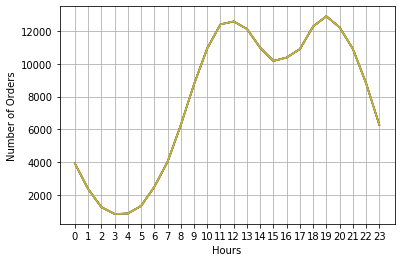

In [17]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# Time shows between 11am to 7pm(19) display advertisements to maximise likelihood of customer's buying product.

### What products are most often sold together

In [18]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(100)

/home/ankittyagi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"
...,...,...
2696,239253,"34in Ultrawide Monitor,Wired Headphones"
2702,239258,"AA Batteries (4-pack),AAA Batteries (4-pack)"
2704,239259,"Vareebadd Phone,Flatscreen TV"
2736,239290,"Wired Headphones,34in Ultrawide Monitor"


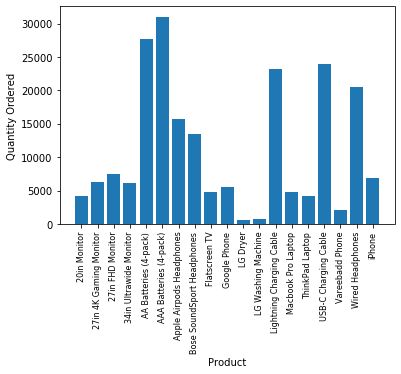

In [19]:
# from itertools import combinations
# from collections import Counter

# count = counter()
# for row in df['Grouped']:
#     row_list = row.split(',')
#     count.update(Counter(combinations(row_list, 2)))
    
# for key, value in count.most_common(10):
#     print(ket, value)


product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

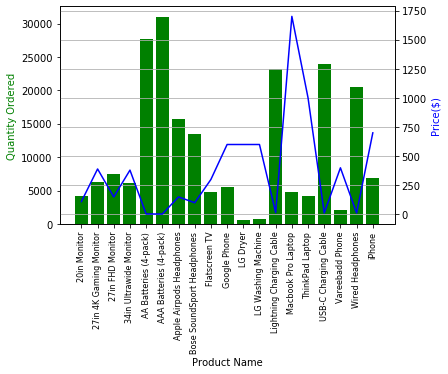

In [20]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='green')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.grid()
plt.show()